# Práctica 03. Infecciones activas de COVID-19 en México durante 2025

# Angel Jesus Martinez Briones

10 de diciembre del 2025

Realiza un análisis exploratorio visual y estadístico del número de infecciones activas por COVID-19 en México durante el año 2025.

**Casos activos por semana epidemiológica a nivel nacional (2025)**
   - Crea la columna `semana_epidemiologica`. Utiliza el atributo `pandas.Series.dt.isocalendar`
   - Elabora un gráfico de líneas con `semana_epidemiologica` en el eje x y el número de casos activos en el eje y.
   - Asegúrate de filtrar correctamente para mantener solo 2025.

**Resumen nacional (2025)**
   - Calcula media, mediana, varianza y desviación estándar de los casos activos a nivel nacional.
   - Usa estos momentos para describir el comportamiento de la epidemia.

**Casos activos por entidad federativa (2025)**
   - Elige tres estados distintos.
   - Genera una línea temporal de casos activos para cada uno.
   - Incluye anotaciones o líneas verticales si hay picos importantes.

**Histograma de casos activos por grupos de edad (2025)**
   - Agrupa por rango etario (ejemplo: 0–9, 10–19, ..., 70+). Utiliza el método ` pd.cut`
   - Crea un grafico de barras
   - Resalta visualmente el grupo con mayor incidencia.

**Preguntas abiertas**
- ¿Qué grupos etarios son los más afectados y por qué?
- ¿Cuál sería tu recomendación a una Secretaría de Salud estatal con base en los datos?

La actividad se debe entregar en formato PDF.

Utiliza la siguiente estructura:

-   Introducción
-   Índice
-   Desarrollo
-   Conclusiones 
-   Referencias

# Introduccion 

Esta practica buscara realizar un analisis visual y estadistico de los casos activos de COVID-19 en México durante el año 2025. El objetivo es revisar a nivel nacional la dinamica de la epidemia a la etidad federativa, para ello se aprovecharon las series de tiempo semanales, estadísticas resumen y visualizaciones claras para que se facilite su interpretación. 

Es muy importante realizar un analisi como el presente, ya que nos permite entender el comportamiento real de este viruz que fue pandemia en el año 2019, sin un analisis como este no se llevaria un registro de la evoluvion a dia de hoy 2025. Tambien ayudaria a calificar la eficacia de las medidas sanitarias que el pais a tomado para controlar estos casos de contajio, y por que no tambien podria servir para apoyar a las desiciones que se toman para la salud publica de los mexicanos. 

Esta practica tambien revelara las desigualdades entre las entidades estatales, mediante este analisis podemos obtener graficas para exponer a la ciudadania el tranbajo y el resultado de las medidas de salud impuestas en los ultimos años, ademas de generar un antecedente cientifico para un analisis en posteriores años.

# Indice
* [Introducción](#introduccion)
* [Índice](#indice)
* [Desarrollo](#desarrollo)
* [Conclusión](#conclusion)
* [Referencias](#referencias)

# Desarrollo

In [1]:
#Importamos las liberias y cargamos el archvo .csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("COVID19MEXICO.csv")
df.info()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146400 entries, 0 to 146399
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   FECHA_ACTUALIZACION        146400 non-null  object
 1   ID_REGISTRO                146400 non-null  object
 2   ORIGEN                     146400 non-null  int64 
 3   SECTOR                     146400 non-null  int64 
 4   ENTIDAD_UM                 146400 non-null  int64 
 5   SEXO                       146400 non-null  int64 
 6   ENTIDAD_NAC                146400 non-null  int64 
 7   ENTIDAD_RES                146400 non-null  int64 
 8   MUNICIPIO_RES              146400 non-null  int64 
 9   TIPO_PACIENTE              146400 non-null  int64 
 10  FECHA_INGRESO              146400 non-null  object
 11  FE

In [2]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_PCR,RESULTADO_PCR_COINFECCION,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL_COVID,CLASIFICACION_FINAL_FLU,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2025-12-09,167f1a,1,12,1,2,1,1,3,1,...,997,997,2,97,6,6,99,México,97,97
1,2025-12-09,60bdae,1,15,29,1,29,29,50,1,...,997,997,2,97,6,6,99,México,97,97
2,2025-12-09,g77f0f3,1,4,21,1,21,21,114,1,...,997,997,2,97,6,6,99,México,97,97
3,2025-12-09,gbbb80b,1,4,20,2,20,20,413,1,...,997,997,2,97,6,6,99,México,97,97
4,2025-12-09,ga47252,1,12,9,1,9,9,13,1,...,5,5,2,97,7,7,99,México,97,97


In [11]:
#**Casos activos por semana epidemiológica a nivel nacional (2025)**
#- Crea la columna `semana_epidemiologica`. Utiliza el atributo `pandas.Series.dt.isocalendar`
#- Elabora un gráfico de líneas con `semana_epidemiologica` en el eje x y el número de casos activos en el eje y.
#- Asegúrate de filtrar correctamente para mantener solo 2025.

df["FECHA_INGRESO"] = pd.to_datetime(df["FECHA_INGRESO"])
df["semana_epidemiologica"] = df["FECHA_INGRESO"].dt.isocalendar().week
df["anio_epidemiologico"] = df["FECHA_INGRESO"].dt.isocalendar().year

df_2025 = df[df["anio_epidemiologico"] == 2025]

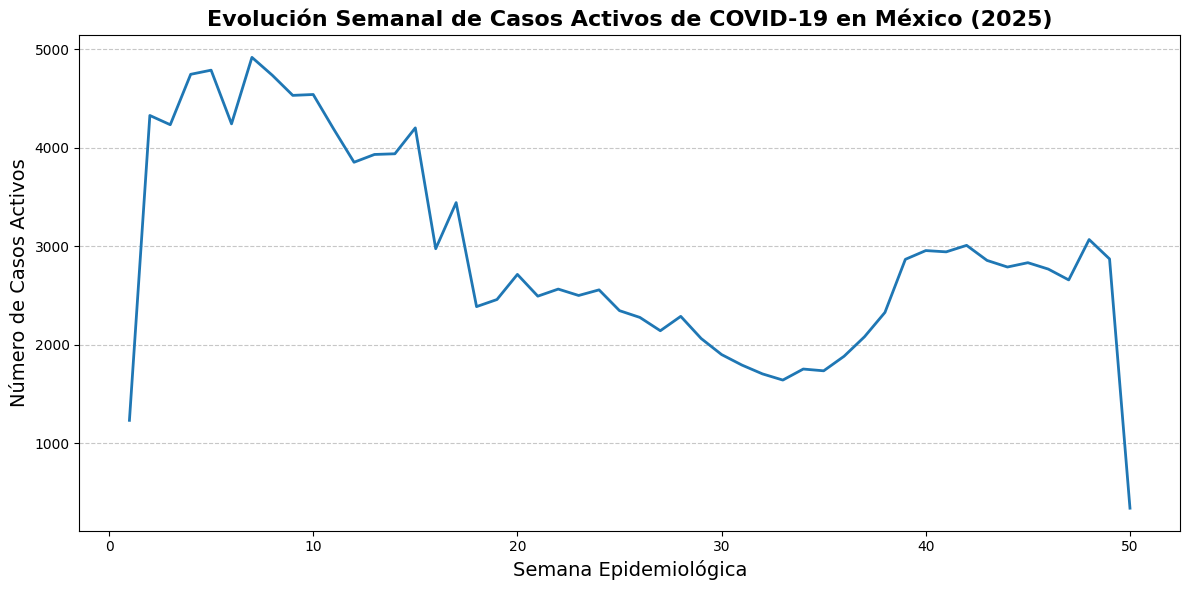

In [10]:
datos_a_graficar = df_2025.groupby("semana_epidemiologica")["ID_REGISTRO"].count()

plt.figure(figsize=(12, 6)) 

datos_a_graficar.plot(kind='line', linewidth=2, color='#1f77b4')

plt.title(
    "Evolución Semanal de Casos Activos de COVID-19 en México (2025)", 
    fontsize=16, 
    fontweight='bold'
)

plt.ylabel("Número de Casos Activos", fontsize=14)

plt.xlabel("Semana Epidemiológica", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [14]:
#**Resumen nacional (2025)**   
#- Calcula media, mediana, varianza y desviación estándar de los casos activos a nivel nacional.   
#- Usa estos momentos para describir el comportamiento de la epidemia.

media = datos_a_graficar.mean()
mediana = datos_a_graficar.median()
varianza = datos_a_graficar.var()
desviacion_estandar = datos_a_graficar.std()

print("Resumen Estadístico de Casos Activos Semanales (2025)")
print(f"Media (Promedio semanal):        {media:,.2f} casos")
print(f"Mediana (Promedio semanal) :         {mediana:,.2f} casos")
print(f"Varianza (Promedio semanal): {varianza:,.2f}")
print(f"Desviación Estándar (Promedio semanal): {desviacion_estandar:,.2f} casos")

Resumen Estadístico de Casos Activos Semanales (2025)
Media (Promedio semanal):        2,928.00 casos
Mediana (Promedio semanal) :         2,778.50 casos
Varianza (Promedio semanal): 1,120,125.92
Desviación Estándar (Promedio semanal): 1,058.36 casos


El análisis visual y estadístico de los casos activos semanales en México durante 2025 revela una fuerte volatilidad de dos olas principales de contagio, en la grafica podemos observar que la primera ola empiezan en la semana 0 y termina por semana 15 y la segunda hola empiza por la 35 y acaba en la 50.

La media (2,928) es ligeramente superior a la mediana (2,778). Esto sugiere que la distribución tiene una diferencia causada por los picos altos de casos, que jalan el promedio hacia arriba. Sin embargo la diferencia es moderada, por lo que promedio es una buena representación del centro de los datos.

La desviación estándar alta (1,058 casos) en relación con la Media (2,928) confirma la alta volatilidad de la epidemia. Esto significa que el número de casos activos por semana estuvo muy lejos del promedio. puesto que hubo semanas con muchísimos casos cerca de 5,000 en el pico y semanas con muy pocos casos cerca de 1,500 en su parte mas baja.


In [16]:
df_filter = df
df_filter['ENTIDAD_RES'].unique()

array([ 1, 29, 21, 20,  9,  8, 32, 10,  7,  2, 17, 13, 30, 19, 31, 22, 25,
       24, 14, 15, 28, 11, 23, 16, 26,  3, 18,  5, 27,  4, 12,  6])

In [19]:
#**Casos activos por entidad federativa (2025)**
#- Elige tres estados distintos.
#- Genera una línea temporal de casos activos para cada uno.
#- Incluye anotaciones o líneas verticales si hay picos importantes.

import matplotlib.pyplot as plt


mapa_entidades = {
    1: 'AGUASCALIENTES', 2: 'BAJA CALIFORNIA', 3: 'BAJA CALIFORNIA SUR',
    4: 'CAMPECHE', 5: 'COAHUILA', 6: 'COLIMA',
    7: 'CHIAPAS', 8: 'CHIHUAHUA', 9: 'CIUDAD DE MEXICO',
    10: 'DURANGO', 11: 'GUANAJUATO', 12: 'GUERRERO',
    13: 'HIDALGO', 14: 'JALISCO', 15: 'MEXICO',
    16: 'MICHOACAN', 17: 'MORELOS', 18: 'NAYARIT',
    19: 'NUEVO LEON', 20: 'OAXACA', 21: 'PUEBLA',
    22: 'QUERETARO', 23: 'QUINTANA ROO', 24: 'SAN LUIS POTOSI',
    25: 'SINALOA', 26: 'SONORA', 27: 'TABASCO',
    28: 'TAMAULIPAS', 29: 'TLAXCALA', 30: 'VERACRUZ',
    31: 'YUCATAN', 32: 'ZACATECAS'
}

df_2025['NOMBRE_ESTADO'] = df_2025['ENTIDAD_RES'].map(mapa_entidades)


codigos_a_comparar = [1, 23, 16] 
datos_estatales = {}

for codigo in codigos_a_comparar:
    df_estado = df_2025[df_2025["ENTIDAD_RES"] == codigo]
    serie_semanal = df_estado.groupby("semana_epidemiologica")["ID_REGISTRO"].count()
    nombre_estado = mapa_entidades.get(codigo, f"Código {codigo}")
    datos_estatales[nombre_estado] = serie_semanal

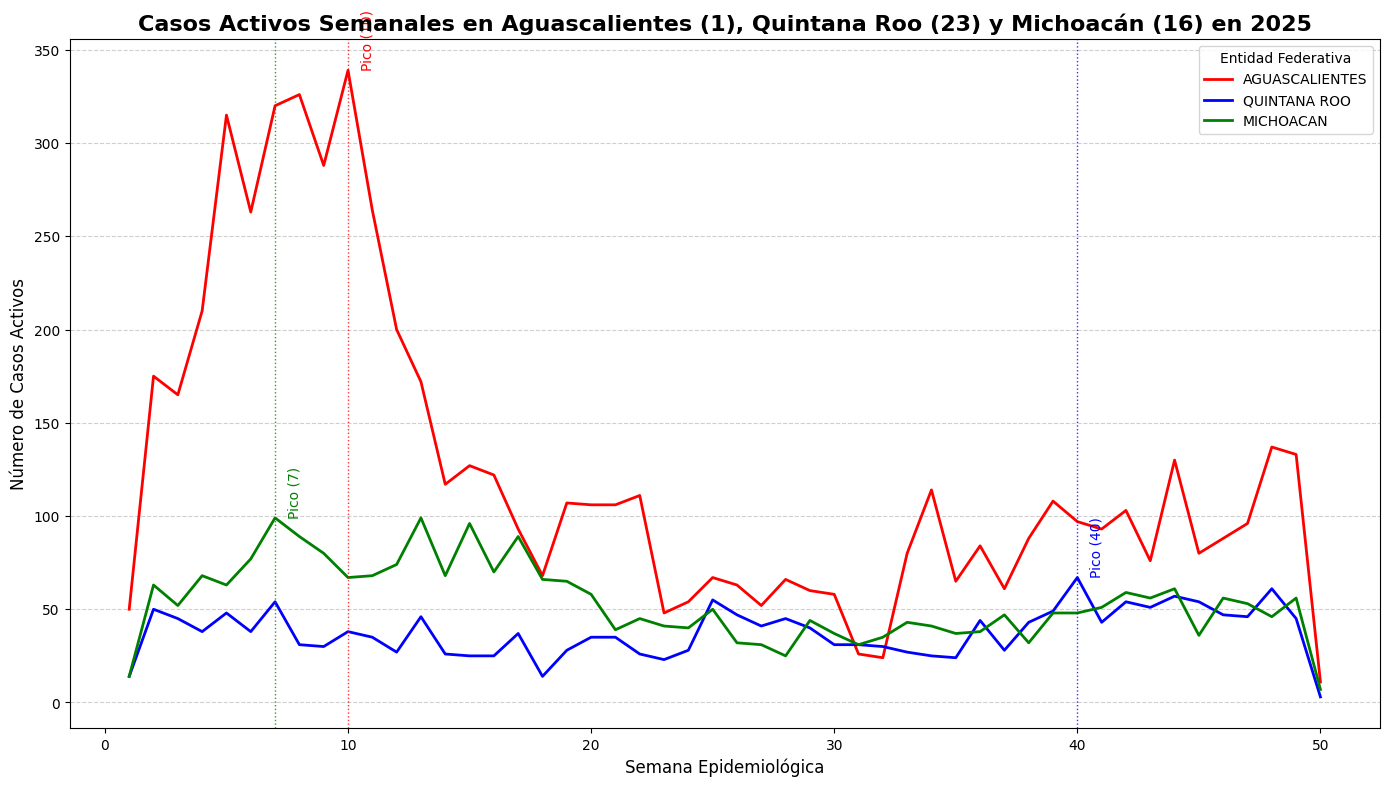

In [20]:
plt.figure(figsize=(14, 8))

colores = {'AGUASCALIENTES': 'red', 'QUINTANA ROO': 'blue', 'MICHOACAN': 'green'}
picos = {} 

for estado, serie in datos_estatales.items():
    color = colores.get(estado, 'gray')
    plt.plot(serie.index, serie.values, label=estado, linewidth=2, color=color)
    pico_valor = serie.max()
    semana_pico = serie.idxmax()
    picos[estado] = (semana_pico, pico_valor)


plt.title(
    "Casos Activos Semanales en Aguascalientes (1), Quintana Roo (23) y Michoacán (16) en 2025",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("Semana Epidemiológica", fontsize=12)
plt.ylabel("Número de Casos Activos", fontsize=12)
plt.legend(title="Entidad Federativa", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)


for estado, (semana_pico, pico_valor) in picos.items():
    color = colores.get(estado, 'gray')
    plt.axvline(x=semana_pico, color=color, linestyle=':', linewidth=1, alpha=0.8)
    plt.text(semana_pico + 0.5, pico_valor, f'Pico ({semana_pico})', 
             color=color, rotation=90, verticalalignment='bottom')

plt.tight_layout()
plt.show()


In [ ]:
#**Histograma de casos activos por grupos de edad (2025)**
#- Agrupa por rango etario (ejemplo: 0–9, 10–19, ..., 70+). Utiliza el método ` pd.cut`
#- Crea un grafico de barras
#- Resalta visualmente el grupo con mayor incidencia.

In [21]:
rangos = [0, 10, 20, 30, 40, 50, 60, 70, df_2025["EDAD"].max() + 1]
etiquetas = ["0-9 años","10-19 años","20-29 años","30-39 años","40-49 años","50-59 años","60-69 años","70+ años"]

df_2025["RANGO_ETARIO"] = pd.cut(
    x=df_2025["EDAD"],     
    bins=rangos,             
    labels=etiquetas,        
    include_lowest=True,   
    right=False             
)

In [23]:
resumen_etario = df_2025.groupby("RANGO_ETARIO", observed=False)["ID_REGISTRO"].count()
print("Conteo de Casos Activos por Rango Etario (2025)")
print(resumen_etario.sort_values(ascending=False))

Conteo de Casos Activos por Rango Etario (2025)
RANGO_ETARIO
0-9 años      33988
20-29 años    18908
30-39 años    18723
70+ años      18525
40-49 años    15697
50-59 años    15516
60-69 años    12654
10-19 años    12389
Name: ID_REGISTRO, dtype: int64


Resaltando: 0-9 años con 33988 casos.


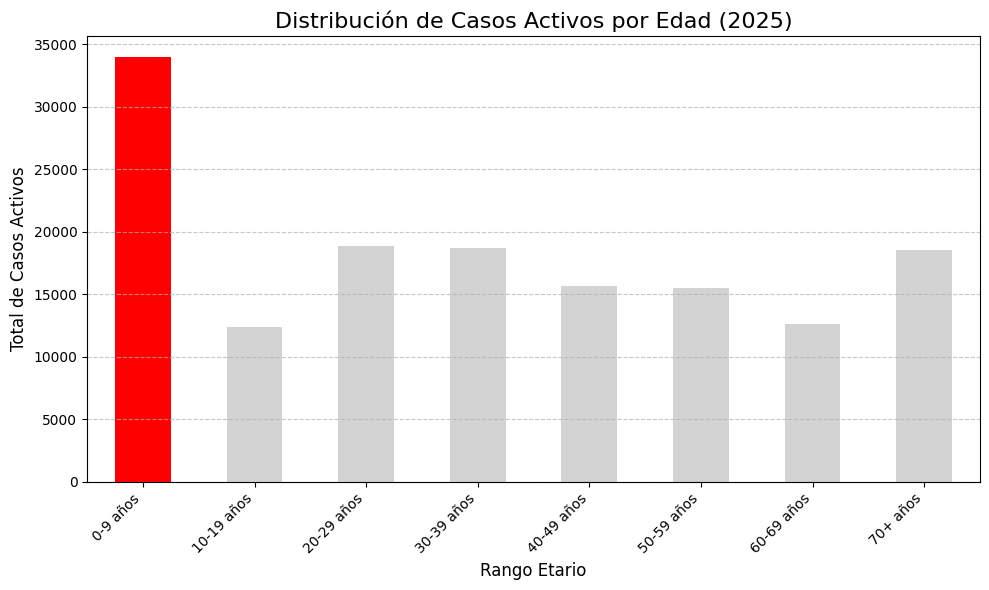

In [26]:
plt.figure(figsize=(10, 6))
resumen_etario.plot(kind='bar', color='skyblue')

colores = ['lightgray'] * len(resumen_etario)
color_resaltado = 'red'

for i, (rango, casos) in enumerate(resumen_etario.items()):
    if casos == max_casos:
        colores[i] = color_resaltado
        print(f"Resaltando: {rango} con {casos} casos.")
resumen_etario.plot(kind='bar', color=colores)

plt.title("Distribución de Casos Activos por Edad (2025)", fontsize=16)
plt.xlabel("Rango Etario", fontsize=12)
plt.ylabel("Total de Casos Activos", fontsize=12)
plt.xticks(rotation=45, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Preguntas abiertas**
- ¿Qué grupos etarios son los más afectados y por qué?

Conforme a el analisis que hicismos los grupos mas afectados fueron los niños menores a 9 años, pienso que esto se debe a las defensas bajas que tienen los seres humanos en su ciclo temprano de vida, cabe señalar que este analisis se hizo con reportes de ingreso al hospital, seria interesante hcaerlo con las tazas de defuncion y ver cual es el grupo mas vulnerable.

- ¿Cuál sería tu recomendación a una Secretaría de Salud estatal con base en los datos?

Mi recomendacion seria reforzar las medidas de prevencion de contajios en las escuelas basicas, para poder asi tambien reducir el numero de afectados, creo que una medida que se deberia tomar en un futuro rebrote es suspender clases de nuevo ya que lae estadistica nos dice que los niños menores son un grupo que ayudaria a la epidemia a su propagacion.

# Conclusion

La realización de este análisis permitió poner en práctica de manera efectiva los conceptos aprendidos en clase, particularmente en lo referente al manejo, transformación y exploración de datos.

En cuanto al analisis de los datos cabe mencionar que de esos datos de puede obtener una cantidad realmente relevante de informacion, 
por ejemplo tambien existian columanas donde se especificaba una enfermedad cornica, o el inicio de los sitomas a la hospitalizacion,
si pertenecia a un grupo indigena y por supuesto por region, tambien hubiera estado bien saber si ya contaban con vacuna o no, incluso analizar a los grupos indigenas por separado, algo relevante pudo haber salido de ahi, sin duda fue una actividad interesante de la 
cual me gustaria hacar mas analisis.


# Referencias

Pandas Development Team. (n.d.). Pandas. Pandas: Python Data Analysis Library. https://pandas.pydata.org/

NumPy Developers. (n.d.). NumPy. NumPy. https://numpy.org/

Matplotlib Development Team. (n.d.). Matplotlib. Matplotlib: Visualization with Python. https://matplotlib.org/